In [39]:
import pandas as pd

df_combined = pd.read_csv("combined_ovhc_insurance.csv")

# Show all column names
print(df_combined.columns.tolist())

['Company', 'Visa Types', 'ED Payment Method', 'Children <12 Covered', 'Coverage Details', 'Monthly Premium (AUD)']


In [40]:
df_combined['Children <12 Covered'].unique()

array(['Yes', 'Yes, included in couple or family plans',
       'Yes, covered under family plans',
       'Yes, under family/couple policies', 'Yes, family cover available',
       'Yes, under family cover', 'Yes, under family policy',
       'Yes, included with family plans'], dtype=object)

In [41]:
# Clean the column (lowercase + remove extra spaces)
df_combined['Children <12 Covered'] = df_combined['Children <12 Covered'].astype(str).str.strip().str.lower()

# Filter rows where the column starts with 'yes'
df_children = df_combined[df_combined['Children <12 Covered'].str.startswith('yes')]

# Save to new CSV
df_children.to_csv("children_under_12_ovhc.csv", index=False)

# Preview result
df_children.head()

,Company,Visa Types,ED Payment Method,Children <12 Covered,Coverage Details,Monthly Premium (AUD)
0,Medibank,"600, 601, 651, 417, 462",Direct billing with network providers; otherwi...,yes,"Hospital, GP visits, emergency, ambulance",From $88.88/month (Starter Plan)
1,Bupa,"600, 485, 417, 462, others",Direct billing with Bupa hospitals and provide...,"yes, included in couple or family plans","Hospital, specialist, emergency, ambulance, pa...",From $82.10/month (Basic Visitors Cover)
2,Allianz Care Australia,"600, 482, 485, 417, 462",Direct billing at partner hospitals; reimburse...,"yes, covered under family plans","Inpatient, outpatient, ambulance, emergency, d...",From $78/month (Budget Working Visa Cover)
3,nib,"600, 482, 485, 417, 462","Direct billing with nib First Choice network, ...","yes, under family/couple policies","Emergency, hospital, GP, ambulance, limited de...",From $81.25/month (Visitors Plus policy)
4,ahm (by Medibank),"600, 482, 485, others",Reimbursement mostly; some direct billing for ...,"yes, family cover available","Hospital, emergency, some extras with higher p...",From $83.40/month (Basic policy)


/var/folders/g_/gpmbk_kx47774ckqqb1kt2b40000gn/T/ipykernel_34256/193569162.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_children, x='Company', palette='viridis', order=df_children['Company'].value_counts().index)


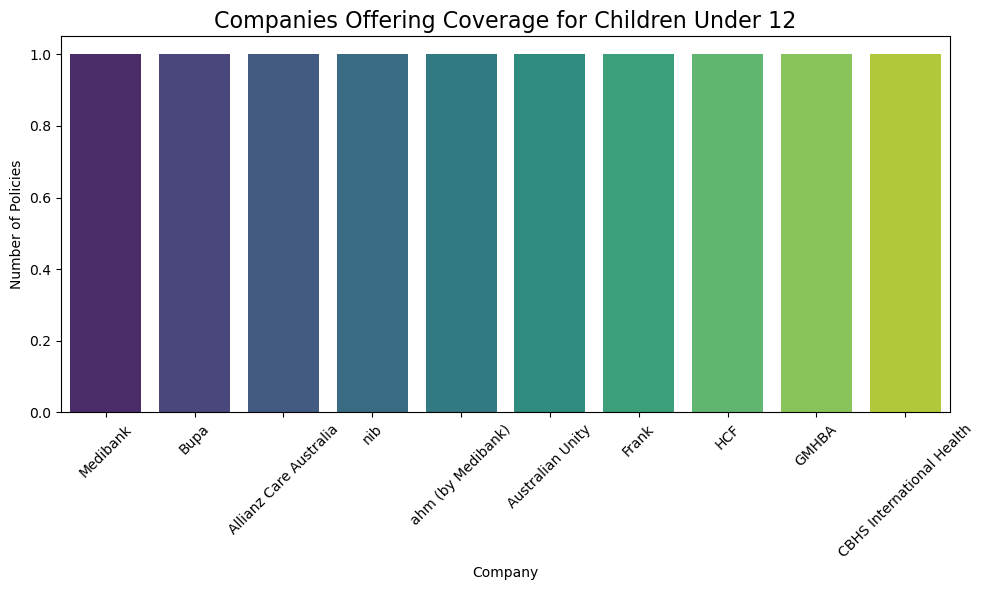

In [43]:
#Number of companies offering coverage
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df_children, x='Company', palette='viridis', order=df_children['Company'].value_counts().index)
plt.title('Companies Offering Coverage for Children Under 12', fontsize=16)
plt.xlabel('Company')
plt.ylabel('Number of Policies')
plt.xticks(rotation=45)
plt.tight_layout()

# save the plot
plt.savefig('companies_covers_children.png')
plt.show()


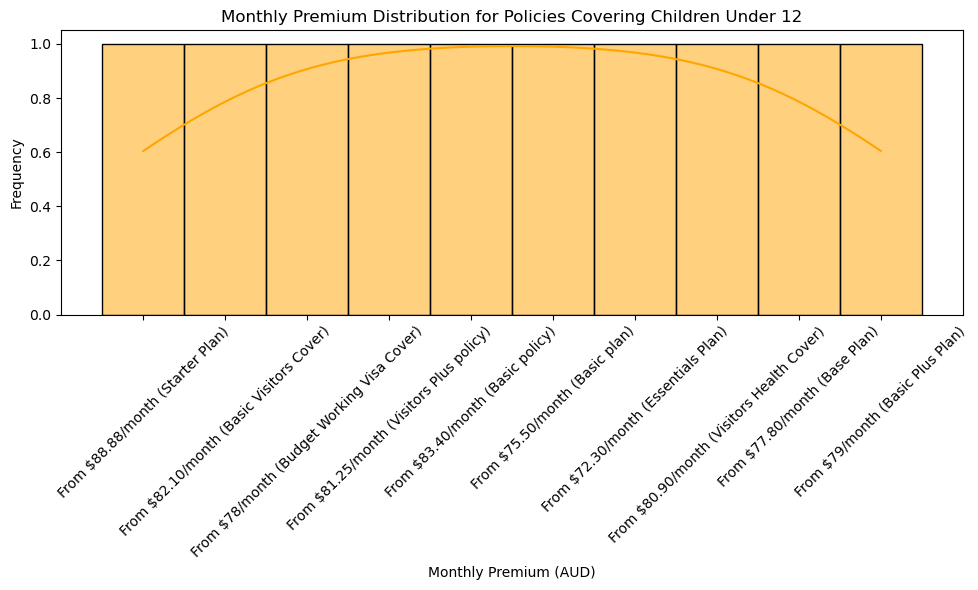

In [44]:
#Monthly premium distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_children['Monthly Premium (AUD)'], kde=True, bins=15, color='orange')
plt.title('Monthly Premium Distribution for Policies Covering Children Under 12')
plt.xlabel('Monthly Premium (AUD)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

#save the plot
plt.savefig('monthly_distribution_covers_children.png')
plt.show()

/var/folders/g_/gpmbk_kx47774ckqqb1kt2b40000gn/T/ipykernel_34256/1813385664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_children, x='Visa Types', palette='Set2', order=df_children['Visa Types'].value_counts().index)


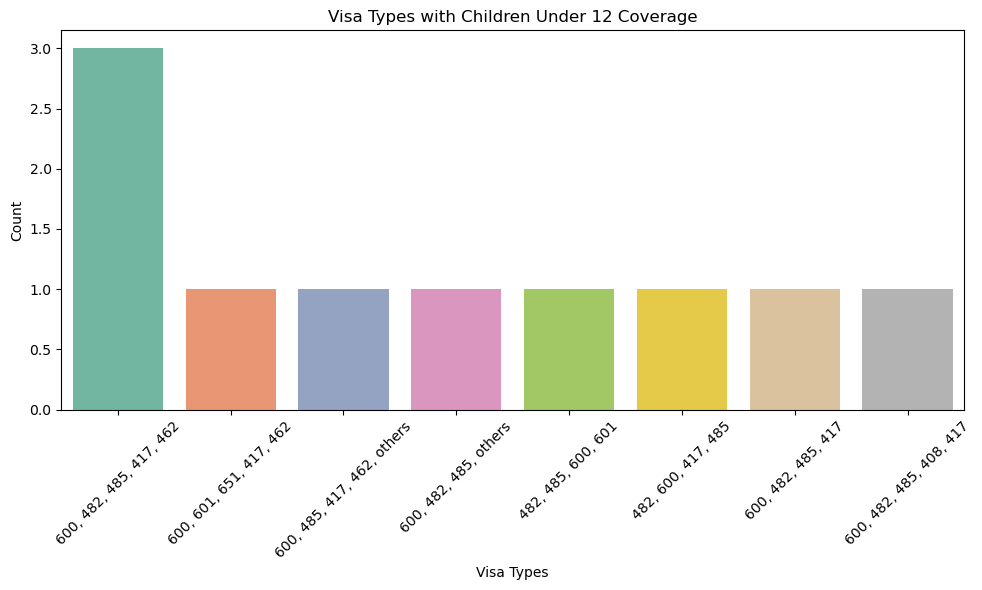

In [50]:
#visa type for children coverage
plt.figure(figsize=(10, 6))
sns.countplot(data=df_children, x='Visa Types', palette='Set2', order=df_children['Visa Types'].value_counts().index)
plt.title('Visa Types with Children Under 12 Coverage')
plt.xlabel('Visa Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

#save the plot
plt.savefig('visa_type_children_coverage.png')
plt.show()

In [51]:
#Define ED Payment Method Groups
# Convert to lowercase to standardize
df_children['ED Payment Method'] = df_children['ED Payment Method'].astype(str).str.lower()

# Define mapping logic
def categorize_ed_method(method):
    if "direct billing" in method:
        return "Direct Billing"
    elif "reimbursement" in method:
        return "Reimbursement"
    elif "both" in method or ("direct" in method and "reimbursement" in method):
        return "Mixed"
    else:
        return "Other/Unknown"

# Apply categorization
df_children['ED Category'] = df_children['ED Payment Method'].apply(categorize_ed_method)

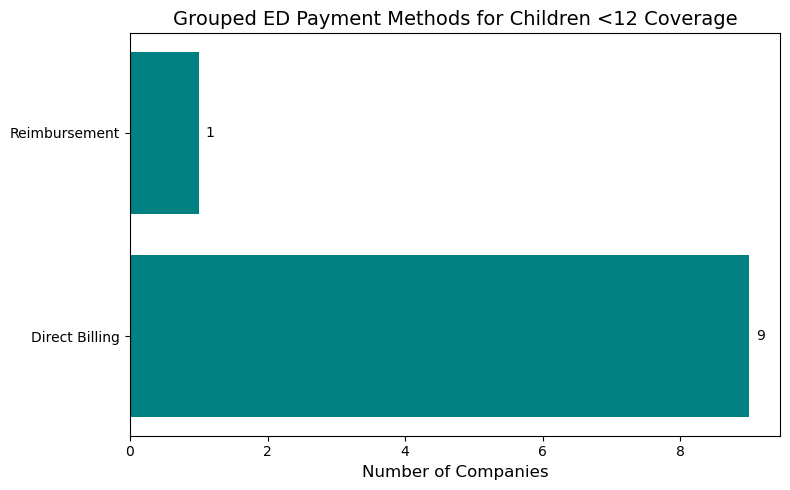

In [52]:
#Visualize the Grouped ED Categories
# Count each ED Category
ed_group_counts = df_children['ED Category'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(ed_group_counts.index, ed_group_counts.values, color='teal')
plt.xlabel("Number of Companies", fontsize=12)
plt.title("Grouped ED Payment Methods for Children <12 Coverage", fontsize=14)

# Annotate counts
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, str(int(width)), va='center')

plt.tight_layout()

#save the plot
plt.savefig('ed_payment_grouped.png')
plt.show()

In [53]:
df_children[['Company', 'ED Payment Method', 'ED Category']]

,Company,ED Payment Method,ED Category
0,Medibank,direct billing with network providers; otherwi...,Direct Billing
1,Bupa,direct billing with bupa hospitals and provide...,Direct Billing
2,Allianz Care Australia,direct billing at partner hospitals; reimburse...,Direct Billing
3,nib,"direct billing with nib first choice network, ...",Direct Billing
4,ahm (by Medibank),reimbursement mostly; some direct billing for ...,Direct Billing
5,Australian Unity,reimbursement; some direct billing with partne...,Direct Billing
6,Frank,"reimbursement, some direct payments at partner...",Reimbursement
7,HCF,direct billing with hcf providers; others reim...,Direct Billing
8,GMHBA,reimbursement; limited direct billing,Direct Billing
9,CBHS International Health,direct billing at cbhs partner hospitals; othe...,Direct Billing
